In [1]:
!pip install roboflow
!pip install ultralytics


from roboflow import Roboflow
rf = Roboflow(api_key="ma4uwwnTIDfJ567zH2gL")
project = rf.workspace("personal-protective-equipment").project("ppes-kaxsi")
version = project.version(8)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 8.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPEs-8 in yolov9:: 100%|██████████| 49860/49860 [00:01<00:00, 39997.75it/s]


In [4]:
from ultralytics import YOLO # type: ignore

model = YOLO('yolov8n.pt')

try:
    model.train(data='PPEs-8/data.yaml', epochs=1, imgsz=640, batch=16)
    print("Dataset carregado corretamente!")
except Exception as e:
    print(f"Erro ao carregar dataset: {e}")


predictions = model.predict(source='woman.jpg', conf=0.1, save=True, save_dir='results')

Ultralytics 8.3.35 🚀 Python-3.12.4 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 11895MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=PPEs-8/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

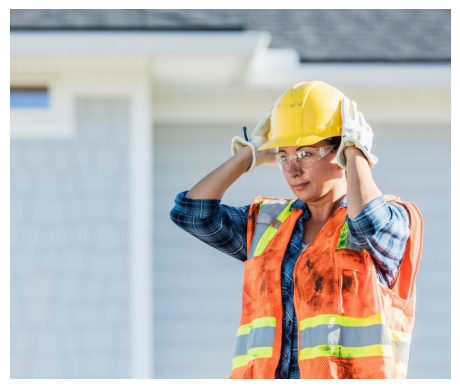

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

output_image_path = '/content/runs/detect/train3/woman.jpg'

image = Image.open(output_image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


In [5]:
try:
    model.train(
    data='/content/PPEs-8/data.yaml',
    epochs=100,
    imgsz=800,
    batch=8,
    lr0=0.001,
    freeze=10,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.5,
    translate=0.1,
    scale=0.5,
    shear=0.5,
    flipud=0.5,
    fliplr=0.5,
    save_period=10,
    val=True
)
except Exception as e:
    print(f"Erro ao carregar dataset: {e}")
results = model.val()

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/PPEs-8/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=800, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/PPEs-8/train/labels.cache... 19419 images, 3 backgrounds, 0 corrupt: 100%|██████████| 19419/19419 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/PPEs-8/valid/labels.cache... 3570 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3570/3570 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.1G      2.925      4.715      2.586         25        800:   0%|          | 12/2428 [00:03<08:55,  4.51it/s]Process Process-9:
      1/100       1.1G      2.925      4.715      2.586         25        800:   0%|          | 12/2428 [00:04<14:05,  2.86it/s]Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 199, in _finalize_join
    thread.join()
  File "/usr/lib/python3.10/threading.py", line 1096, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.10/threading.py", line 1116,

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-e58e5feb0d75>", line 2, in <cell line: 1>
    model.train(
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 802, in train
    self.trainer.train()
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 207, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 392, in _do_train
    self.optimizer_step()
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 593, in optimizer_step
    self.ema.update(self.model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py", line -1, in update
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback 

TypeError: object of type 'NoneType' has no len()

Exception in thread Thread-53 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3